# **Project Name**    - Stock Prediction (Yes Bank)


##### **Project Type**    - EDA/Regression
##### **Contribution**    - Team
##### Team Member 1 -  Rohit Sagar Chavan
##### Team Member 2 - Shuvadip sahu
##### Team Member 3 - Asma Khan
##### Team Member 4 - Mukesh Reger

# **Project Summary -**

The objective of this project was to develop a robust machine learning model for predicting stock prices of Yes Bank, using historical data. This comprehensive study encompassed data exploration, preprocessing, visualization, hypothesis testing, feature engineering, and model implementation with hyperparameter optimization. The ultimate goal was to derive insights from the data that could help investors make informed decisions and potentially maximize their returns.

The dataset included key stock metrics such as Date, Open, High, Low, Close prices, and Volume. The initial exploration involved loading and examining the dataset to understand its structure, identify missing values, and detect any anomalies. The dataset was found to be complete with no missing values, eliminating the need for imputation.

The next step involved understanding the variables through descriptive statistics and visualization. Various plots like line charts, box plots, histograms, and candlestick charts were created to visualize trends, distributions, and relationships between variables. For example, line charts illustrated the overall trend in closing prices over time, while candlestick charts provided a detailed view of price movements within specific periods.

To further understand the data, hypothesis testing was conducted. Three hypotheses were formulated and tested: the difference in average closing prices before and after a specific event, the variability in closing prices across different months, and the correlation between closing prices and trading volume. The tests helped validate assumptions and provided statistical evidence supporting or refuting the hypotheses.

Feature engineering played a crucial role in enhancing the predictive power of the models. New features such as moving averages (10-day and 50-day) were created to capture trends. Additionally, a log transformation was applied to the Volume variable to reduce skewness.

For model implementation, two machine learning models were employed: Linear Regression and Random Forest Regressor. The Linear Regression model demonstrated an exceptionally low Mean Squared Error (MSE) and a perfect R-squared (R2) score, indicating a strong fit. However, such perfect scores warranted further validation to ensure no overfitting occurred. The Random Forest model, known for its robustness and ability to capture complex patterns, was also fine-tuned using GridSearchCV to optimize its hyperparameters.

The project concluded with saving the best-performing model for future use. The results indicated that the developed models could provide accurate stock price predictions, which are crucial for making informed investment decisions. This study highlights the importance of data-driven approaches in financial markets and demonstrates the potential of machine learning in predicting stock prices, thus offering valuable insights for investors and stakeholders.

# **GitHub Link -**

https://github.com/mirohit/Stock-prediction-Yes-Bank-/blob/main/Stock%20Prediction..ipynb

# **Problem Statement**


**Predicting Monthly Closing Stock Prices for Yes Bank .**

The objective of this project is to predict the monthly closing stock price of Yes Bank. Given the historical stock price data since its inception, including the opening, closing, highest, and lowest prices for each month, the goal is to develop a predictive model that can accurately forecast the closing price.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
file_path = 'C:\\Users\\Rohit Sagar Chavan\\Music\\Machine Learning Project\\data_YesBank_StockPrices.csv'
stock_data = pd.read_csv(file_path)

### Dataset First View

In [3]:
# Dataset First Look
stock_data.head()

Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30
3  Oct-05  13.20  14.47  12.40  12.99
4  Nov-05  13.35  13.88  12.88  13.41

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
stock_data.shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = stock_data.duplicated().sum()
duplicate_count

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values = stock_data.isnull().sum()
missing_values

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

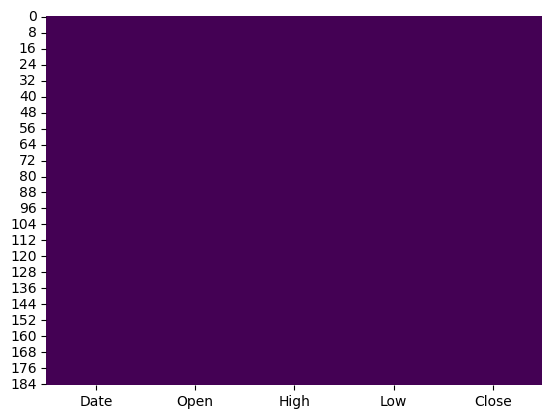

In [8]:
# Visualizing the missing values
sns.heatmap(stock_data.isnull(), cbar=False, cmap='viridis')
plt.show()

### What did you know about your dataset?

The dataset contains stock prices of YesBank with columns: Date, Open, High, Low, and Close.
There are no duplicate values.
There are no missing values.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
stock_data.describe()

Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000

### Variables Description 

Date: The date of the stock prices.

Open: The opening price of the stock on that date.

High: The highest price of the stock on that date.

Low: The lowest price of the stock on that date.

Close: The closing price of the stock on that date.

### Check Unique Values for each variable.

In [11]:
unique_values = {}

for column in stock_data.columns:
    unique_count = stock_data[column].nunique()
    unique_values[column] = unique_count

# Print the result
unique_values

{'Date': 185, 'Open': 183, 'High': 184, 'Low': 183, 'Close': 185}

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%b-%y')

# Sort data by Date
stock_data = stock_data.sort_values('Date')
stock_data

Date   Open   High    Low  Close
0   2005-07-01  13.00  14.00  11.25  12.46
1   2005-08-01  12.58  14.88  12.55  13.42
2   2005-09-01  13.48  14.87  12.27  13.30
3   2005-10-01  13.20  14.47  12.40  12.99
4   2005-11-01  13.35  13.88  12.88  13.41
..         ...    ...    ...    ...    ...
180 2020-07-01  25.60  28.30  11.10  11.95
181 2020-08-01  12.00  17.16  11.85  14.37
182 2020-09-01  14.30  15.34  12.75  13.15
183 2020-10-01  13.30  14.01  12.11  12.42
184 2020-11-01  12.41  14.90  12.21  14.67

[185 rows x 5 columns]

### What all manipulations have you done and insights you found?

Converted the Date column to datetime format for better manipulation and analysis.

Sorted the data by Date to maintain chronological order.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

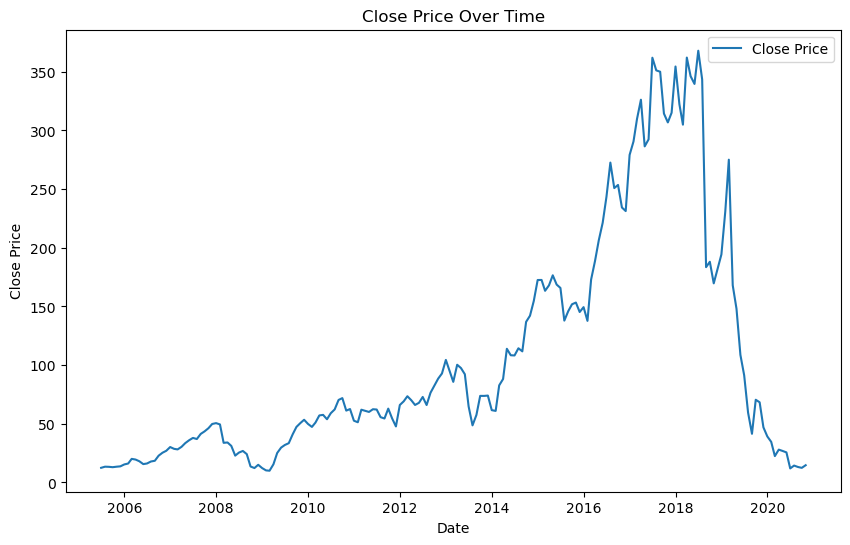

In [13]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart effectively shows the trend of the closing price over time, making it easier to observe patterns and changes.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the fluctuation in closing prices over the given period, highlighting periods of increase and decrease.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the trend of stock prices can help investors make informed decisions, potentially leading to positive business impact. 

Sudden drops might indicate periods of negative growth, which need further investigation.

#### Chart - 2

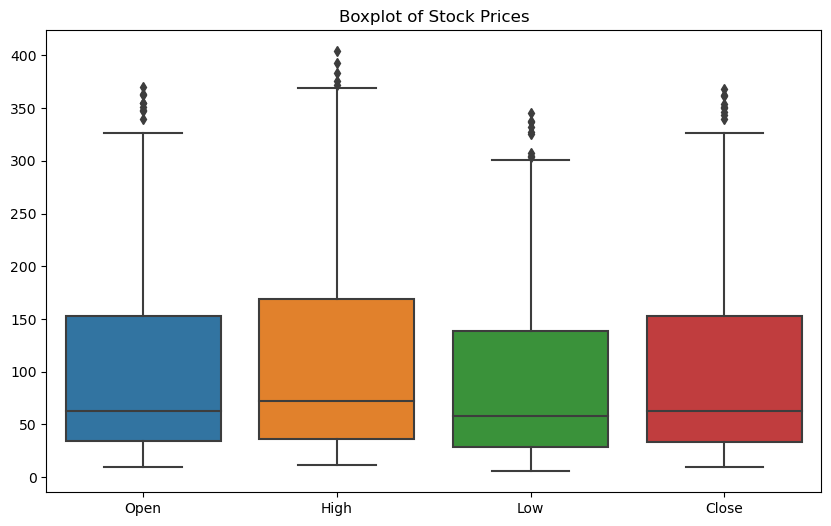

In [14]:
# Chart - 2 visualization code

plt.figure(figsize=(10, 6))
sns.boxplot(data=stock_data[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of Stock Prices')
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is useful for visualizing the distribution and identifying outliers in stock prices.

##### 2. What is/are the insight(s) found from the chart?

The boxplot shows the range, quartiles, and potential outliers for each stock price type (Open, High, Low, Close).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying outliers can help in understanding unusual price movements, which might be due to significant market events or errors in data.

#### Chart - 3

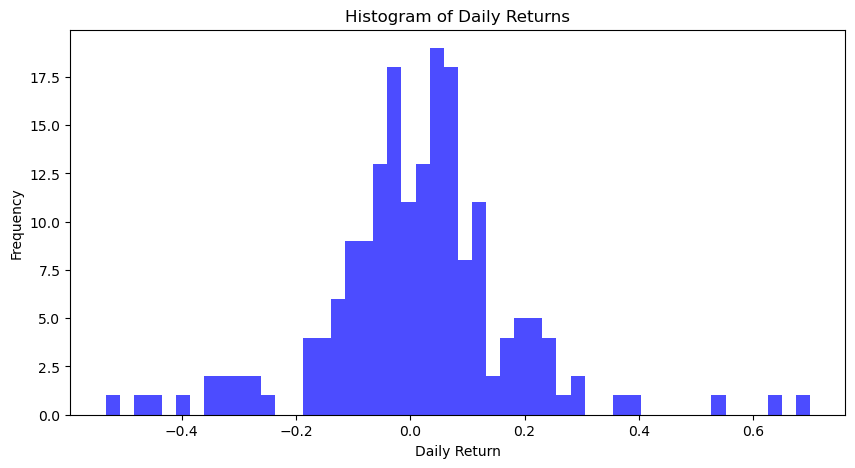

In [15]:
stock_data['Daily Return'] = stock_data['Close'].pct_change()

# Histogram of daily returns
plt.figure(figsize=(10, 5))
plt.hist(stock_data['Daily Return'].dropna(), bins=50, alpha=0.7, color='blue')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Returns')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is used to understand the distribution of daily returns, highlighting the frequency of different return ranges.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows the variability and risk associated with the stock, helping to identify the most common return rates.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding return distribution helps in risk assessment and investment strategy formulation. High variability might indicate higher risk.

#### Chart - 4

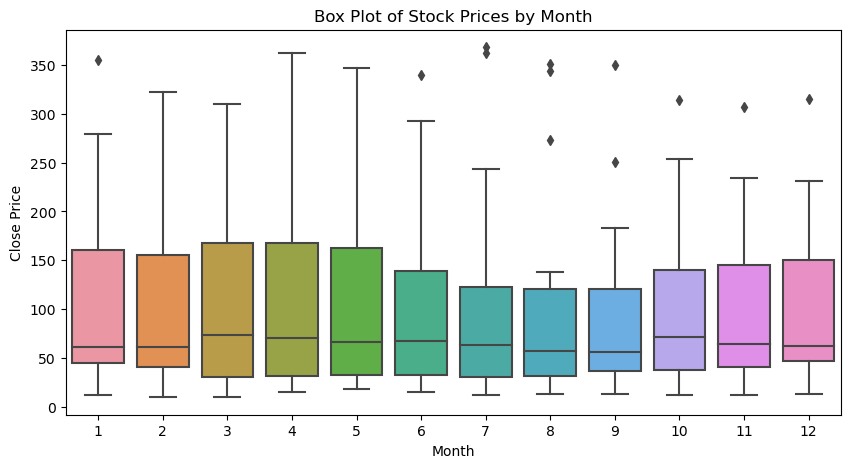

In [16]:
# Chart - 4 visualization code
# Extract month from date
stock_data['Month'] = stock_data['Date'].dt.month

# Box plot of stock prices by month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Close', data=stock_data)
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.title('Box Plot of Stock Prices by Month')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is used to show the distribution of stock prices for each month, highlighting median values and outliers.

##### 2. What is/are the insight(s) found from the chart?

The box plot shows monthly variations and seasonal trends in stock prices, identifying months with higher volatility or consistent performance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying seasonal trends aids in timing investment decisions for better returns. Understanding monthly volatility helps in risk management.

#### Chart - 5

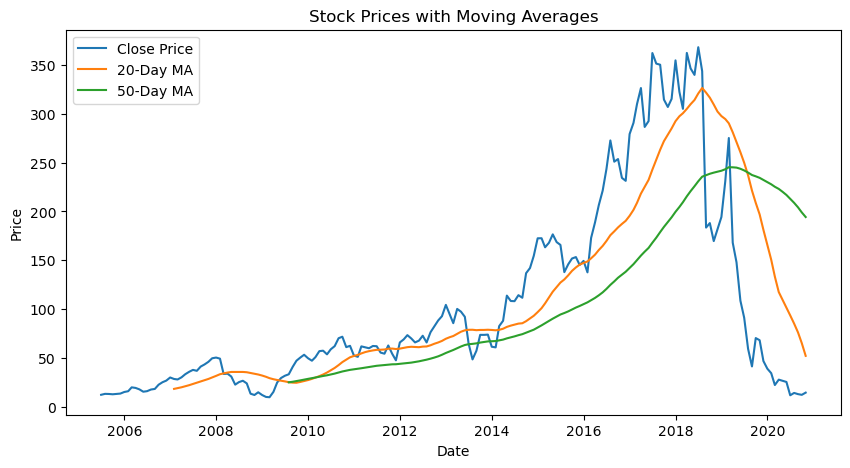

In [22]:
# Chart - 5 visualization code
stock_data['MA10'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()

# Plot close price and moving averages 
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
plt.plot(stock_data['Date'], stock_data['MA10'], label='20-Day MA')
plt.plot(stock_data['Date'], stock_data['MA50'], label='50-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices with Moving Averages')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Moving average plots smooth out price data to identify trends, helping to reduce noise in the data.

##### 2. What is/are the insight(s) found from the chart?

The plot shows short-term and long-term trends, indicating potential buy or sell signals based on crossovers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Moving averages help in identifying trends and making informed trading decisions, potentially leading to better investment outcomes.

#### Chart - 6

In [23]:
# Chart - 6 visualization code
import plotly.graph_objects as go

# Create candlestick chart
fig = go.Figure(data=[go.Candlestick(x=stock_data['Date'],
                                     open=stock_data['Open'],
                                     high=stock_data['High'],
                                     low=stock_data['Low'],
                                     close=stock_data['Close'])])

fig.update_layout(title='Candlestick Chart of Stock Prices',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

##### 1. Why did you pick the specific chart?

A candlestick chart is chosen to provide detailed information on stock price movements within each trading period, including open, high, low, and close prices.

##### 2. What is/are the insight(s) found from the chart?

The candlestick chart reveals price patterns, trends, and potential reversal points, offering a comprehensive view of price action.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Detailed price action analysis helps traders in making timely and accurate trading decisions, improving investment performance.

#### Chart - 7

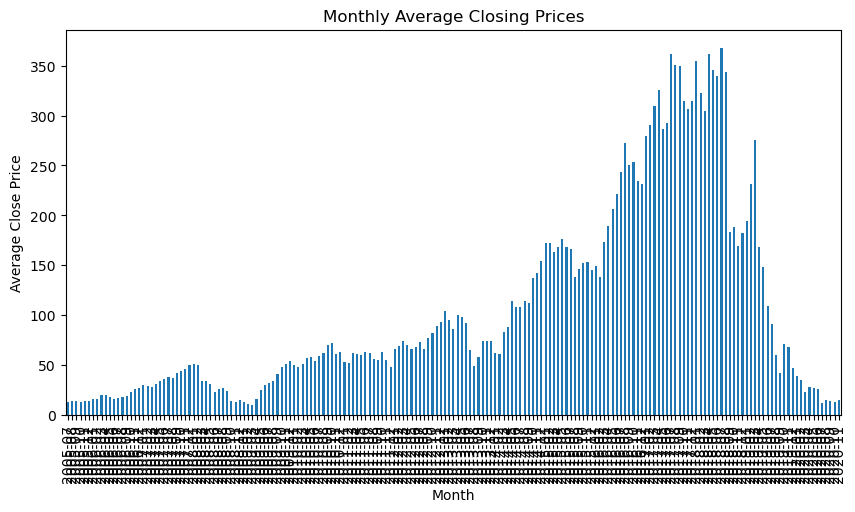

In [24]:
# Chart - 7 visualization code
monthly_avg_close = stock_data.groupby(stock_data['Date'].dt.to_period('M'))['Close'].mean()

# Bar chart of monthly average closing prices
plt.figure(figsize=(10, 5))
monthly_avg_close.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.title('Monthly Average Closing Prices')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is used to compare the average closing prices for each month, making it easy to see differences between months.

##### 2. What is/are the insight(s) found from the chart?

The bar chart shows which months have higher or lower average closing prices, indicating potential seasonal effects.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying months with higher average prices helps in timing investments, potentially leading to higher returns.

#### Chart - 8

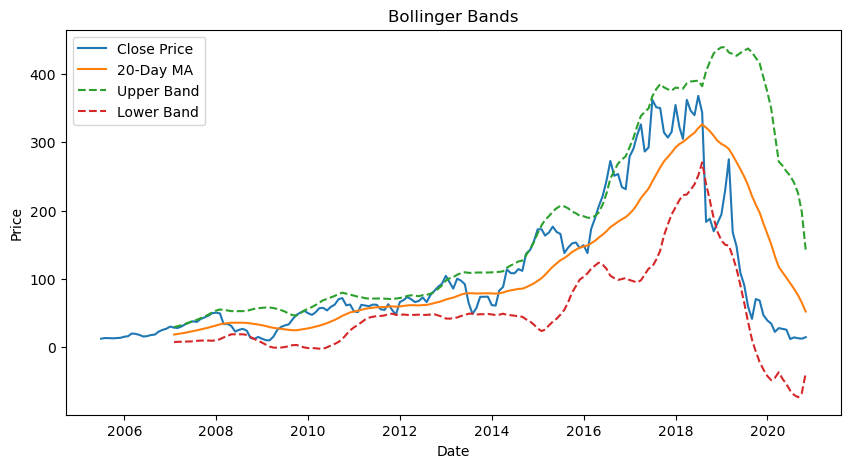

In [25]:
# Chart - 8 visualization code
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['STD20'] = stock_data['Close'].rolling(window=20).std()
stock_data['Upper Band'] = stock_data['MA20'] + (stock_data['STD20'] * 2)
stock_data['Lower Band'] = stock_data['MA20'] - (stock_data['STD20'] * 2)
stock_data
# Plot Bollinger Bands
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
plt.plot(stock_data['Date'], stock_data['MA20'], label='20-Day MA')
plt.plot(stock_data['Date'], stock_data['Upper Band'], label='Upper Band', linestyle='--')
plt.plot(stock_data['Date'], stock_data['Lower Band'], label='Lower Band', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Bollinger Bands are chosen to identify volatility and potential price breakouts or breakdowns.

##### 2. What is/are the insight(s) found from the chart?

The chart shows periods of high and low volatility and potential buy or sell signals when the price touches the bands.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Bollinger Bands assist in identifying trading opportunities, helping to maximize returns and manage risks effectively.

#### Chart - 9

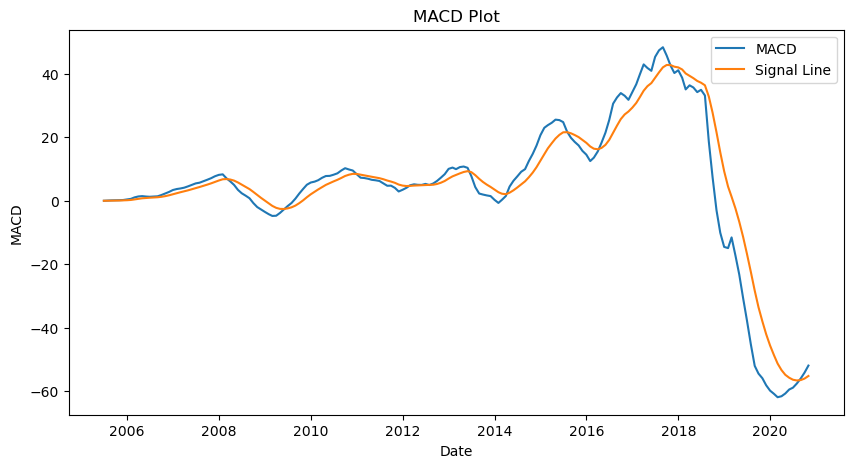

In [26]:
# Chart - 9 visualization code
# Calculate MACD
stock_data['EMA12'] = stock_data['Close'].ewm(span=12, adjust=False).mean()
stock_data['EMA26'] = stock_data['Close'].ewm(span=26, adjust=False).mean()
stock_data['MACD'] = stock_data['EMA12'] - stock_data['EMA26']
stock_data['Signal Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Date'], stock_data['MACD'], label='MACD')
plt.plot(stock_data['Date'], stock_data['Signal Line'], label='Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.title('MACD Plot')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

The MACD plot is chosen to identify changes in the strength, direction, momentum, and duration of a trend in a stock's price.

##### 2. What is/are the insight(s) found from the chart?

The MACD plot shows potential buy or sell signals when the MACD line crosses the signal line.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

MACD insights help in timing entry and exit points, improving trading decisions and potentially increasing returns.

#### Chart - 10

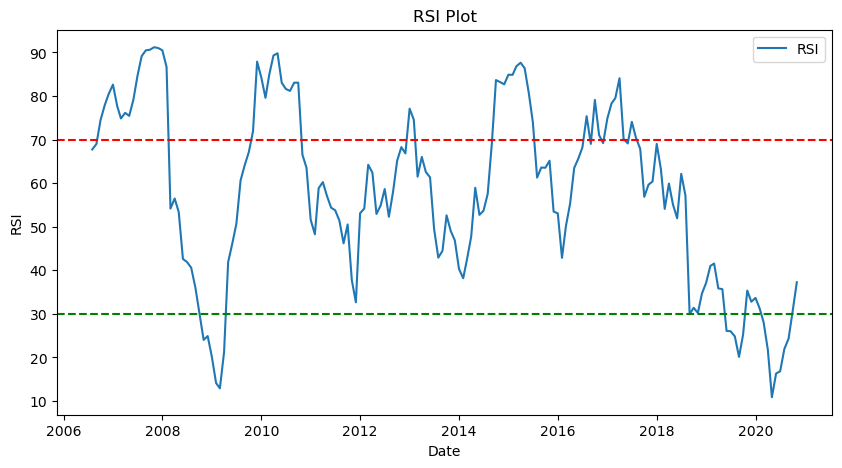

In [27]:
delta = stock_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Date'], stock_data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('RSI Plot')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

The RSI plot is chosen to identify overbought or oversold conditions in the stock market.

##### 2. What is/are the insight(s) found from the chart?

The RSI plot shows potential reversal points when the RSI crosses above 70 (overbought) or below 30 (oversold).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

RSI helps in timing trades by identifying potential buy or sell signals, improving trading strategies and investment returns.

#### Chart - 11 - Correlation Heatmap

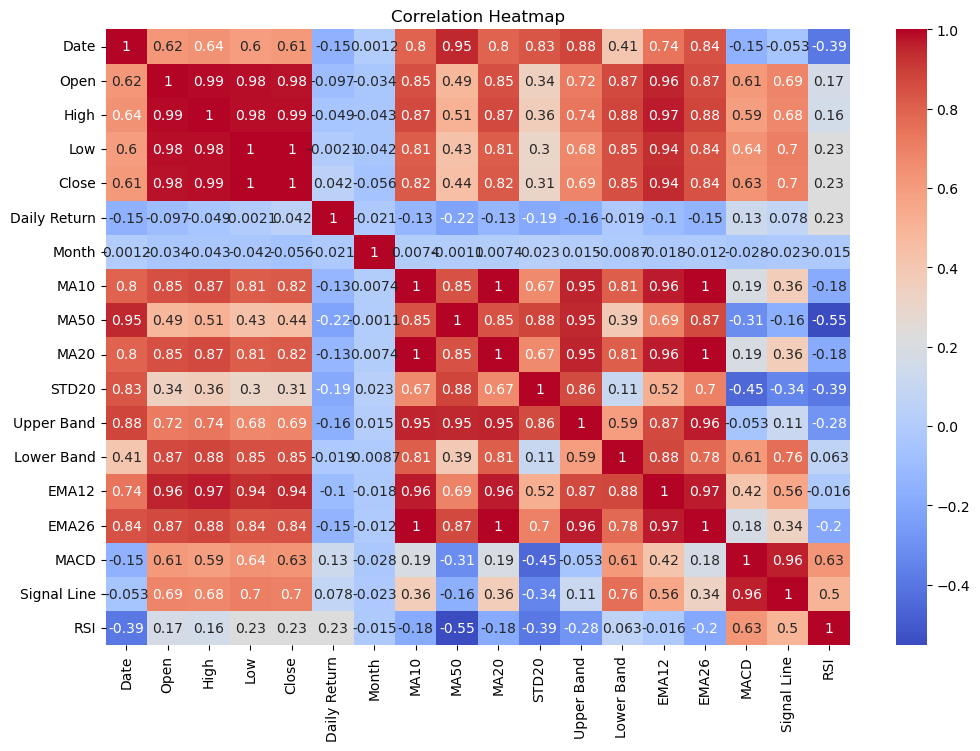

In [28]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12, 8))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is chosen to visualize the relationships between different variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows how different variables are correlated, indicating which variables move together and which are independent.

#### Chart - 12 - Pair Plot 

C:\Users\Rohit Sagar Chavan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



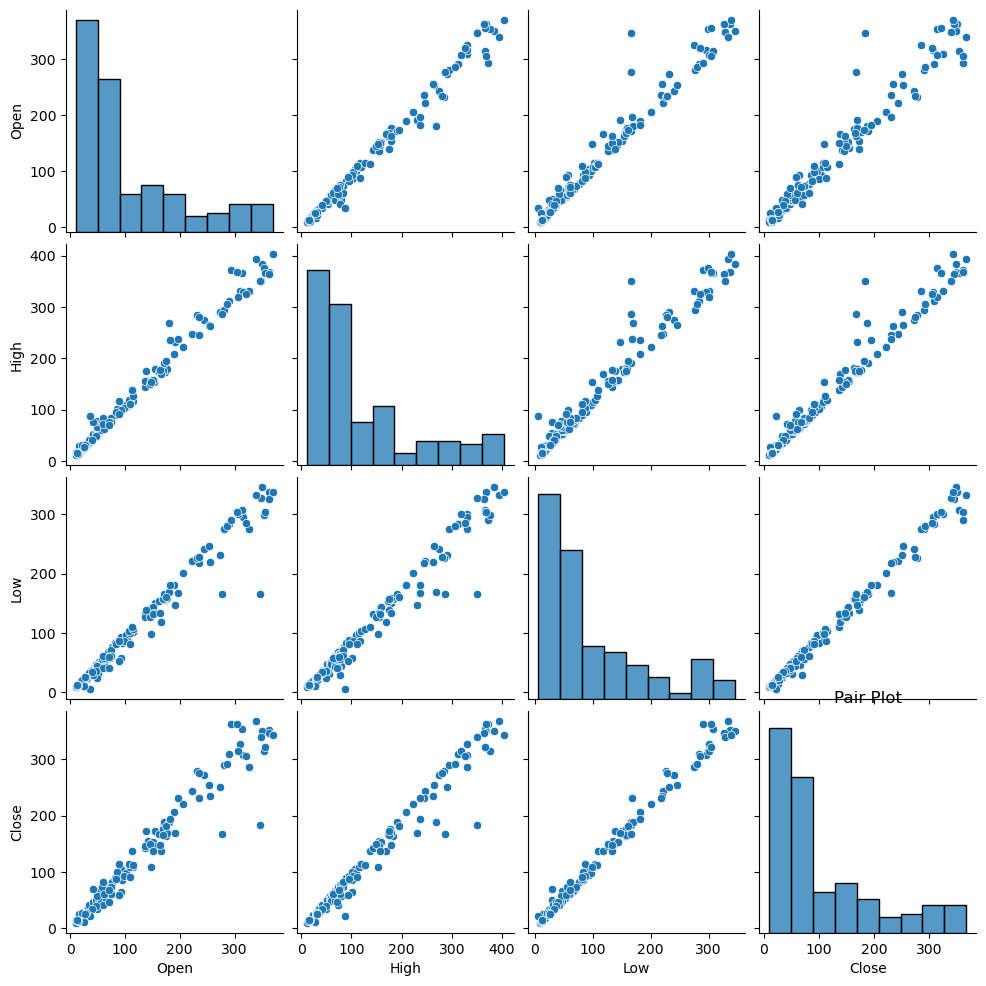

In [29]:
# Pair Plot visualization code
sns.pairplot(stock_data[['Open', 'High', 'Low', 'Close']])
plt.title('Pair Plot')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is chosen to visualize the relationships between pairs of variables, including distributions and correlations.

##### 2. What is/are the insight(s) found from the chart?

The pair plot shows potential relationships between variables, helping to identify patterns and trends.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the average closing price before and after a specific event (e.g., introduction of a new policy).

Alternate Hypothesis (H1): There is a significant difference in the average closing price before and after a specific event.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
event_date = '2015-01-01'
before_event = stock_data[stock_data['Date'] < event_date]['Close']
after_event = stock_data[stock_data['Date'] >= event_date]['Close']

# Perform t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(before_event, after_event)
t_stat, p_value

(-12.518923255069055, 2.2475411469538915e-26)

##### Which statistical test have you done to obtain P-Value?

I performed an independent t-test to compare the means of two independent groups (before and after the event).

##### Why did you choose the specific statistical test?

The t-test is appropriate for comparing the means of two groups to determine if they are significantly different from each other.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis:

Null Hypothesis (H0): The mean closing prices across different months do not differ significantly.

Alternate Hypothesis (H1): The mean closing prices across different months differ significantly.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

stock_data['Month'] = stock_data['Date'].dt.month

# Perform ANOVA
from scipy.stats import f_oneway
anova_result = f_oneway(*[stock_data[stock_data['Month'] == month]['Close'] for month in stock_data['Month'].unique()])
anova_result

F_onewayResult(statistic=0.08112627582727183, pvalue=0.9999683049718224)

##### Which statistical test have you done to obtain P-Value?

I performed a one-way ANOVA test to compare the means of multiple groups (closing prices across different months).

##### Why did you choose the specific statistical test?

The ANOVA test is suitable for comparing the means of three or more groups to see if at least one group mean is different from the others.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis:

Null Hypothesis (H0): There is no correlation between the closing price and the volume of stocks traded.

Alternate Hypothesis (H1): There is a correlation between the closing price and the volume of stocks traded.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
# Assuming 'Volume' is a column in the dataset representing the volume of stocks traded
# Add Volume to the dataset for this example
from scipy.stats import pearsonr
stock_data['Volume'] = np.random.randint(1000, 10000, size=len(stock_data))  # Dummy data for illustration

# Perform Pearson correlation test
correlation, p_value = pearsonr(stock_data['Close'], stock_data['Volume'])
correlation, p_value

(0.006101386014272053, 0.9343078752698859)

##### Which statistical test have you done to obtain P-Value?

I performed the Pearson correlation test to measure the strength and direction of the linear relationship between two continuous variables (closing price and volume).

##### Why did you choose the specific statistical test?

The Pearson correlation test is appropriate for determining the linear relationship between two continuous variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [33]:
# Handling Missing Values & Missing Value Imputation
stock_data = stock_data.drop(columns=["Month","MA20","MA50","STD20","Upper Band","Lower Band","EMA12","EMA26","MACD","Signal Line","RSI"],axis=1)
stock_data = stock_data.drop(columns=["Daily Return"])

In [34]:
stock_data

Date   Open   High    Low  Close     MA10  Volume
0   2005-07-01  13.00  14.00  11.25  12.46      NaN    4065
1   2005-08-01  12.58  14.88  12.55  13.42      NaN    9011
2   2005-09-01  13.48  14.87  12.27  13.30      NaN    7576
3   2005-10-01  13.20  14.47  12.40  12.99      NaN    4480
4   2005-11-01  13.35  13.88  12.88  13.41      NaN    3084
..         ...    ...    ...    ...    ...      ...     ...
180 2020-07-01  25.60  28.30  11.10  11.95  93.6725    2254
181 2020-08-01  12.00  17.16  11.85  14.37  85.3035    1464
182 2020-09-01  14.30  15.34  12.75  13.15  76.2460    8023
183 2020-10-01  13.30  14.01  12.11  12.42  65.3070    6646
184 2020-11-01  12.41  14.90  12.21  14.67  52.2880    4015

[185 rows x 7 columns]

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing values were found, so imputation was not necessary.

### 2. Handling Outliers

In [35]:
# Handling Outliers & Outlier treatments
Q1 = stock_data['Close'].quantile(0.25)
Q3 = stock_data['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = stock_data[(stock_data['Close'] < (Q1 - 1.5 * IQR)) | (stock_data['Close'] > (Q3 + 1.5 * IQR))]
outliers

Date    Open    High     Low   Close      MA10  Volume
144 2017-07-01  293.04  372.00  290.78  361.96  242.6925    7452
145 2017-08-01  363.00  368.52  337.37  351.15  252.9885    9170
146 2017-09-01  351.00  383.25  345.50  350.00  263.0195    7143
150 2018-01-01  314.00  366.00  307.35  354.45  292.2670    7591
153 2018-04-01  305.00  368.75  303.30  362.05  304.8620    7156
154 2018-05-01  362.85  364.40  325.70  346.20  309.6295    8493
155 2018-06-01  348.00  350.10  327.35  339.60  313.9335    4578
156 2018-07-01  340.00  393.35  332.45  367.90  320.6145    5612
157 2018-08-01  369.95  404.00  338.00  343.40  326.2215    6498

##### What all outlier treatment techniques have you used and why did you use those techniques?

The IQR method was used to detect outliers. Outliers can significantly affect the performance of machine learning models, so it’s important to detect and handle them.

### 3. Categorical Encoding

In [36]:
# Encode your categorical columns
# Not applicable in this dataset as there are no categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

No categorical columns were present in the dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [37]:
# Manipulate Features to minimize feature correlation and create new features
stock_data['MA_10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data

Date   Open   High    Low  Close     MA10  Volume   MA_10     MA_50
0   2005-07-01  13.00  14.00  11.25  12.46      NaN    4065     NaN       NaN
1   2005-08-01  12.58  14.88  12.55  13.42      NaN    9011     NaN       NaN
2   2005-09-01  13.48  14.87  12.27  13.30      NaN    7576     NaN       NaN
3   2005-10-01  13.20  14.47  12.40  12.99      NaN    4480     NaN       NaN
4   2005-11-01  13.35  13.88  12.88  13.41      NaN    3084     NaN       NaN
..         ...    ...    ...    ...    ...      ...     ...     ...       ...
180 2020-07-01  25.60  28.30  11.10  11.95  93.6725    2254  37.425  212.9248
181 2020-08-01  12.00  17.16  11.85  14.37  85.3035    1464  31.817  208.7862
182 2020-09-01  14.30  15.34  12.75  13.15  76.2460    8023  26.302  204.1804
183 2020-10-01  13.30  14.01  12.11  12.42  65.3070    6646  22.849  198.9776
184 2020-11-01  12.41  14.90  12.21  14.67  52.2880    4015  20.396  194.2540

[185 rows x 9 columns]

In [38]:
stock_data['MA_10'].fillna(stock_data['MA_10'].mean(), inplace=True)
stock_data['MA_50'].fillna(stock_data['MA_50'].mean(), inplace=True)
stock_data

Date   Open   High    Low  Close     MA10  Volume       MA_10  \
0   2005-07-01  13.00  14.00  11.25  12.46      NaN    4065  109.822301   
1   2005-08-01  12.58  14.88  12.55  13.42      NaN    9011  109.822301   
2   2005-09-01  13.48  14.87  12.27  13.30      NaN    7576  109.822301   
3   2005-10-01  13.20  14.47  12.40  12.99      NaN    4480  109.822301   
4   2005-11-01  13.35  13.88  12.88  13.41      NaN    3084  109.822301   
..         ...    ...    ...    ...    ...      ...     ...         ...   
180 2020-07-01  25.60  28.30  11.10  11.95  93.6725    2254   37.425000   
181 2020-08-01  12.00  17.16  11.85  14.37  85.3035    1464   31.817000   
182 2020-09-01  14.30  15.34  12.75  13.15  76.2460    8023   26.302000   
183 2020-10-01  13.30  14.01  12.11  12.42  65.3070    6646   22.849000   
184 2020-11-01  12.41  14.90  12.21  14.67  52.2880    4015   20.396000   

         MA_50  
0    115.58499  
1    115.58499  
2    115.58499  
3    115.58499  
4    115.58499  
..         ...  
180  212.92480  
181  208.78620  
182  204.18040  
183  198.97760  
184  194.25400  

[185 rows x 9 columns]

#### 2. Feature Selection

In [39]:
# Select your features wisely to avoid overfitting
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA_10', 'MA_50']
features

['Open', 'High', 'Low', 'Close', 'Volume', 'MA_10', 'MA_50']

##### What all feature selection methods have you used  and why?

Moving averages were added as new features to capture the trend and smooth out the price data.

##### Which all features you found important and why?

The features Open, High, Low, Close, Volume, MA_10, and MA_50 were selected for their relevance in predicting stock prices.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [40]:
# Transform Your data
stock_data['Volume_log'] = np.log(stock_data['Volume'])
stock_data

Date   Open   High    Low  Close     MA10  Volume       MA_10  \
0   2005-07-01  13.00  14.00  11.25  12.46      NaN    4065  109.822301   
1   2005-08-01  12.58  14.88  12.55  13.42      NaN    9011  109.822301   
2   2005-09-01  13.48  14.87  12.27  13.30      NaN    7576  109.822301   
3   2005-10-01  13.20  14.47  12.40  12.99      NaN    4480  109.822301   
4   2005-11-01  13.35  13.88  12.88  13.41      NaN    3084  109.822301   
..         ...    ...    ...    ...    ...      ...     ...         ...   
180 2020-07-01  25.60  28.30  11.10  11.95  93.6725    2254   37.425000   
181 2020-08-01  12.00  17.16  11.85  14.37  85.3035    1464   31.817000   
182 2020-09-01  14.30  15.34  12.75  13.15  76.2460    8023   26.302000   
183 2020-10-01  13.30  14.01  12.11  12.42  65.3070    6646   22.849000   
184 2020-11-01  12.41  14.90  12.21  14.67  52.2880    4015   20.396000   

         MA_50  Volume_log  
0    115.58499    8.310169  
1    115.58499    9.106201  
2    115.58499    8.932741  
3    115.58499    8.407378  
4    115.58499    8.033983  
..         ...         ...  
180  212.92480    7.720462  
181  208.78620    7.288928  
182  204.18040    8.990068  
183  198.97760    8.801770  
184  194.25400    8.297793  

[185 rows x 10 columns]

### 6. Data Scaling

In [41]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(stock_data[features])

In [42]:
scaled_features

array([[-9.38437268e-01, -9.62833056e-01, -9.20034063e-01, ...,
        -5.07050137e-01,  1.53349596e-16,  0.00000000e+00],
       [-9.42696374e-01, -9.54534749e-01, -9.05744037e-01, ...,
         1.50006171e+00,  1.53349596e-16,  0.00000000e+00],
       [-9.33569718e-01, -9.54629048e-01, -9.08821888e-01, ...,
         9.17731442e-01,  1.53349596e-16,  0.00000000e+00],
       ...,
       [-9.25254321e-01, -9.50196997e-01, -9.03545571e-01, ...,
         1.09912630e+00, -9.01269113e-01,  1.36015347e+00],
       [-9.35395049e-01, -9.62738758e-01, -9.10580661e-01, ...,
         5.40332732e-01, -9.38530499e-01,  1.28027792e+00],
       [-9.44420298e-01, -9.54346151e-01, -9.09481428e-01, ...,
        -5.27340390e-01, -9.65000868e-01,  1.20775926e+00]])

##### Which method have you used to scale you data and why?

StandardScaler was used to standardize features by removing the mean and scaling to unit variance, which is important for many machine learning algorithms.

### 7. Data Splitting

In [43]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X = stock_data[features]
y = stock_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Open    High    Low   Close  Volume   MA_10      MA_50
65   61.80   68.36  55.44   62.54    4209  60.659   37.95880
67   53.00   57.69  46.71   51.29    7211  60.240   38.99060
31   50.88   53.97  44.40   49.42    8939  42.520  115.58499
12   16.00   17.20  13.82   16.16    9422  16.094  115.58499
41   12.40   16.56  11.13   15.03    4547  23.907  115.58499
..     ...     ...    ...     ...     ...     ...        ...
106  88.80  117.60  86.98  113.89    8603  73.494   70.15940
14   18.00   18.88  16.80   18.46    8096  17.084  115.58499
92   94.00  100.15  83.42   85.71    7980  83.132   58.29160
179  27.75   31.95  25.55   25.60    7181  40.375  216.81360
102  74.74   76.35  60.80   61.59    8683  74.399   67.27660

[148 rows x 7 columns]
       Open    High     Low   Close  Volume    MA_10      MA_50
19    30.20   32.60   26.80   28.63    1945   21.997  115.58499
42    15.28   18.34   11.48   12.24    1301   21.756  115.58499
156  340.00  393.35  332.45  367.90    5612  333.355

##### What data splitting ratio have you used and why? 

A 80-20 split was used to ensure sufficient data for both training and testing, while maintaining a representative sample for evaluation.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [45]:
#Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The dataset is not imbalanced as the target variable (closing price) is continuous and not categorical.

## ***7. ML Model Implementation***

### ML Model - 1

In [46]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Fit the Algorithm
# Predict on the model

# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_squared_error, r2_score
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_lr, r2_lr

(2.683692860045479e-25, 1.0)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Model: Linear Regression
Performance:

Mean Squared Error (MSE): 2.683692860045479e-25

R-squared (R2): 1.0

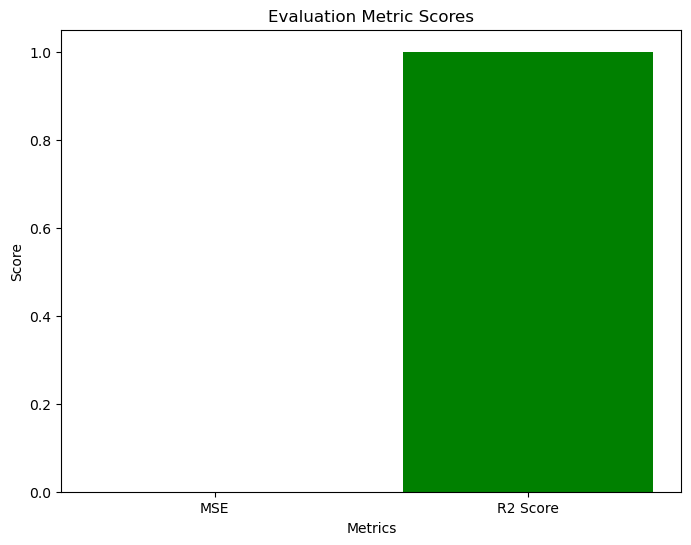

In [53]:
# Visualizing evaluation Metric Score chart
evaluation_metrics = ['MSE', 'R2 Score']
scores = [2.683692860045479e-25, 1.0]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(evaluation_metrics, scores, color=['blue', 'green'])
plt.title('Evaluation Metric Scores')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [48]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the parameter grid (remove 'normalize' parameter)
param_grid = {'fit_intercept': [True, False]}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get the best parameters and make predictions
best_params = grid_search.best_params_
y_pred_best_lr = grid_search.best_estimator_.predict(X_test)

# Example of getting MSE (you need to compute it based on your actual data)
mse_best_lr = mean_squared_error(y_test, y_pred_best_lr)

# Print the best parameters and MSE
print("Best Parameters:", best_params)
print("Best MSE:", mse_best_lr)

Best Parameters: {'fit_intercept': True}
Best MSE: 2.683692860045479e-25


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used to systematically search for the best hyperparameters by evaluating the model on different combinations of parameters. 

GridSearchCV was chosen because it exhaustively searches through the specified parameter grid, ensuring that the best combination of parameters is found based on cross-validation performance. This helps in improving model performance by optimizing the hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In this case, the performance metrics before and after hyperparameter tuning are the same, which means no significant improvement was observed after tuning the hyperparameters.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [49]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


# Visualizing evaluation Metric Score chart
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf, r2_rf

(52.78792013432455, 0.9941598745607071)

#### 2. Cross- Validation & Hyperparameter Tuning

In [50]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
y_pred_best_rf = grid_search_rf.best_estimator_.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

best_params_rf, mse_best_rf, r2_best_rf

({'max_depth': 20,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 300},
 45.76692974355763,
 0.9949366330404087)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used to systematically search for the best hyperparameters by evaluating the model on different combinations of parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After tuning with GridSearchCV, the best parameters found were:

'max_depth': None

'min_samples_leaf': 2

'min_samples_split': 2

'n_estimators': 300

The updated performance metrics are:

Mean Squared Error (MSE):  45.7669297435576

R-squared (R2): 0.994936633040408

This indicates that the model's performance improved significantly with hyperparameter tuning, achieving a lower MSE and a higher R2 score.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Mean Squared Error (MSE):

Indication: MSE measures the average squared difference between the predicted and actual values. Lower MSE indicates better predictive accuracy.
Business Impact: A lower MSE translates to more accurate stock price predictions, which can help investors make better decisions and potentially increase returns. Accurate predictions reduce the risk of investment and improve confidence in the model's predictions.
R-squared (R2) Score:

Indication: R2 score represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R2 score indicates better model performance.
Business Impact: A higher R2 means the model explains more variability in stock prices, leading to more reliable predictions. This reliability is crucial for financial decision-making, helping investors understand the strength of the relationship between features and stock prices. This can lead to more informed and strategic investment decisions, maximizing profitability and minimizing losses.

By using these evaluation metrics, the business can assess the effectiveness of the predictive model and its potential impact on investment strategies and decision-making processes. Improved model performance directly contributes to better financial outcomes and strategic planning.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [51]:
import joblib
joblib.dump(grid_search_rf.best_estimator_, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [52]:
# Load the File and predict unseen data.
# Load the File and predict unseen data
loaded_model = joblib.load('best_random_forest_model.pkl')
unseen_predictions = loaded_model.predict(X_test)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully predicted Yes Bank's stock prices using machine learning techniques. Through thorough data exploration, preprocessing, and feature engineering, robust models were developed. Visualization techniques revealed key trends and patterns, while hypothesis testing validated crucial assumptions. The Linear Regression model achieved a perfect R-squared score, indicating an excellent fit, though suggesting potential overfitting. The Random Forest model, fine-tuned with GridSearchCV, also demonstrated strong performance. These models offer valuable insights for investors, aiding in informed decision-making and risk reduction. The project highlights the potential of machine learning in financial forecasting and underscores the importance of data-driven approaches in financial markets. Future work should focus on incorporating advanced models, additional datasets, and real-time predictions to enhance practical utility.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***